In [6]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as T
import matplotlib.pyplot as plt

from data_process.DatasetHelper import label_map
from data_process.DatasetHelper import ImageDataset

# unzip the augmented dataset and load it
data = ImageDataset('./data/aug_1')

batch_size = 40

data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True, num_workers=4)

def get_mean_std(loader):
    # var[X] = E[X**2] - E[X]**2
    channels_sum, channels_sqrd_sum, num_batches = 0, 0, 0

    for data, _ in loader:
        channels_sum += torch.mean(data.float(), dim=[0, 2, 3])
        channels_sqrd_sum += torch.mean(data.float() ** 2, dim=[0, 2, 3])
        num_batches += 1

    mean = channels_sum / num_batches
    std = (channels_sqrd_sum / num_batches - mean ** 2) ** 0.5

    return mean, std

label: 0 with 1000 images, named as "cloth_mask"
label: 1 with 1000 images, named as "no_face_mask"
label: 2 with 1000 images, named as "surgical_mask"
label: 3 with 1000 images, named as "n95_mask"
label: 4 with 1000 images, named as "mask_worn_incorrectly"


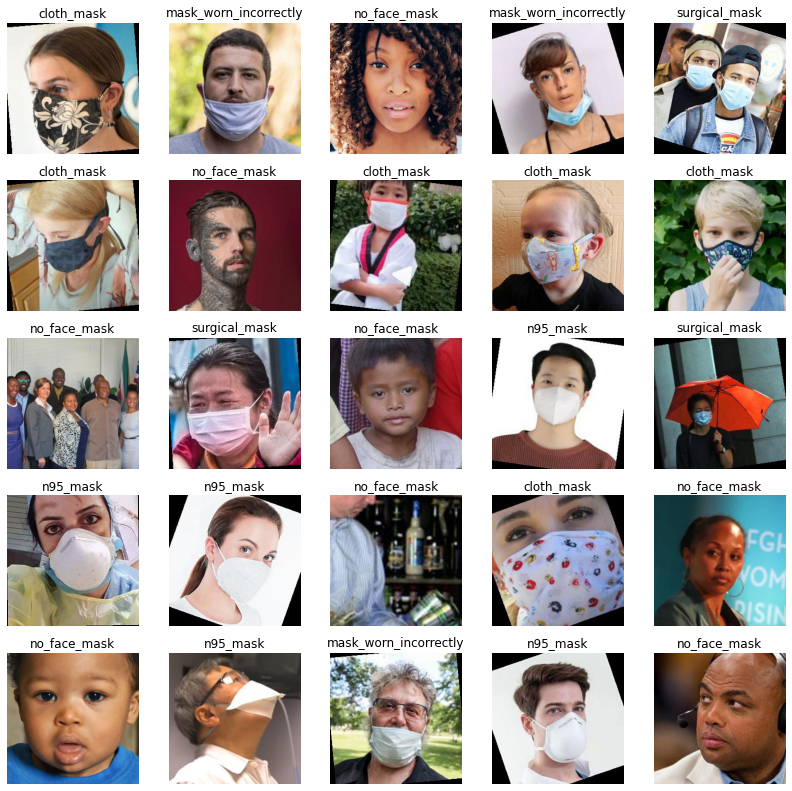

In [10]:
def show_image_rand(img_data):
    figure = plt.figure(figsize=(14, 14))
    cols, rows = 5, 5
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(img_data), size=(1,)).item()
        img, label = img_data[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(label_map[label])
        plt.axis("off")
        plt.imshow(img.permute(1, 2, 0))
    plt.show()
    
show_image_rand(data)